## Mini Project 2: Used Car Price Prediction (Machine Learning (Regression))

**About Dataset**:

Data set contains information of price, transmission, mileage, fuel type, road tax, miles per gallon (mpg), and engine size

->data description:
* model Mercedez model.
* year registraion year.
* price price in Euros.
* transmission type of gear box.
* mileage distance used.
* fuelType engine fuel.
* tax road tax.
* mpg miles per galoon.
* engineSize size in litres.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects dataset/merc_mini_proj_2.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13119 non-null  object 
 1   year          13119 non-null  int64  
 2   price         13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.6+ KB


In [3]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


1. Data Integrity and Preprocessing

Our initial data quality assessment confirms that the dataset is 100% complete, with no missing or null values. This high level of data integrity is advantageous, as it allows us to bypass complex imputation procedures and move directly to the analysis phase, ensuring our model is built on clean, complete records.

2. Exploratory Data Analysis (EDA): Feature Distribution

As part of our initial EDA, we analyzed the distribution of key features. A primary finding relates to the year variable:

    Vehicle Age Profile: The dataset shows a strong central tendency around the manufacturing year 2017 (Mean ≈ 2017). This indicates our analysis is heavily weighted towards late-model used vehicles, which is a critical context for interpreting our final price model.

3. Analysis Objective: Price Driver Identification

The core objective of this analysis is to quantify the relationship between the target variable, Price, and key predictor variables. We will be conducting a bivariate and multivariate analysis focusing on the following features to determine their impact as price drivers:

    mileage

    year

    mpg (fuel efficiency)

    engine_size

4. Visualization & Sampling Strategy

To investigate the relationship between Price and high-cardinality features like mileage, we must address potential visualization challenges.

    Challenge: A standard scatter plot of Price vs. mileage using the full dataset would suffer from severe overplotting, rendering the graph unreadable and obscuring underlying trends.

    Solution: To maintain visual clarity, we will employ a systematic subsampling technique. By plotting a representative sample (e.g., every 200th data point), we can generate a visually interpretable plot that effectively illustrates the correlation and trend without sacrificing analytical integrity.

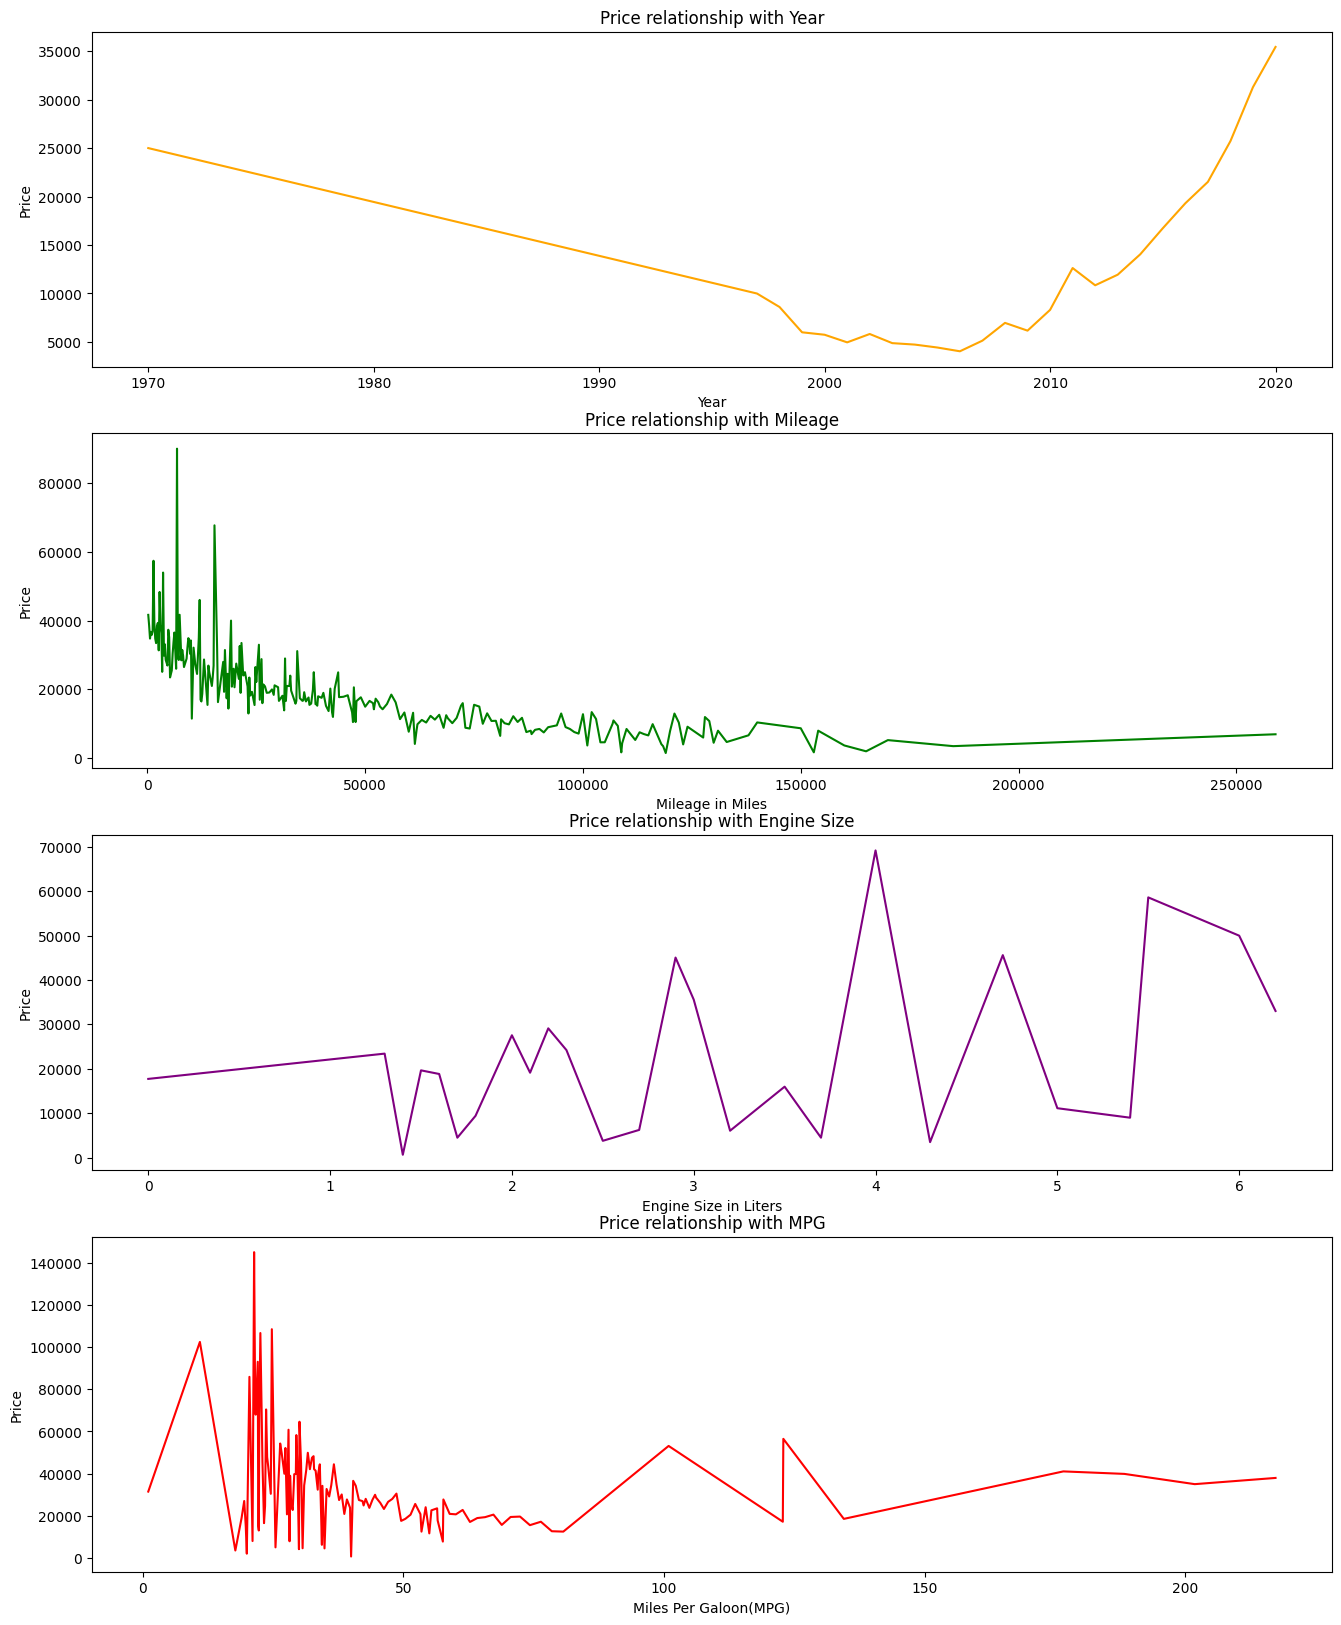

In [4]:
# Taking only the columns needed for ploting
year_price = df.groupby('year')['price'].mean().reset_index()
mileage_price = df.groupby('mileage')['price'].mean().reset_index()
enginesize_price = df.groupby('engineSize')['price'].mean().reset_index()
mpg_price = df.groupby('mpg')['price'].mean().reset_index()

fig, ax = plt.subplots(figsize=(16,20), nrows=4, ncols=1)

# Ploting graph for Price and Year
ax[0].plot(year_price['year'], year_price['price'], c='orange')
ax[0].set(
    title = 'Price relationship with Year',
    xlabel = 'Year',
    ylabel = 'Price'
)

# Taking every 200th value
mask= (mileage_price['mileage']%200 == 0)
mileage_loc=mileage_price.loc[mask]

# Ploting graph for Price and Mileage
ax[1].plot(mileage_loc['mileage'],mileage_loc['price'], c='green')
ax[1].set(
    title = 'Price relationship with Mileage',
    xlabel = 'Mileage in Miles',
    ylabel = 'Price'
)

# Ploting graph for Price and Engine Size
ax[2].plot(enginesize_price['engineSize'],enginesize_price['price'], c='purple')
ax[2].set(
    title = 'Price relationship with Engine Size',
    xlabel = 'Engine Size in Liters',
    ylabel = 'Price'
)

# Ploting graph for Price and MPG
ax[3].plot(mpg_price['mpg'], mpg_price['price'], c='red')
ax[3].set(
    title = 'Price relationship with MPG',
    xlabel = 'Miles Per Galoon(MPG)',
    ylabel = 'Price'
)


plt.show()


**Exploratory Data Analysis: Key Price Drivers**

Our exploratory data analysis (EDA) focused on identifying the primary drivers of vehicle price. We conducted a bivariate analysis, plotting Price against four key quantitative features: year, mileage, engine_size, and mpg.

1. Price vs. Year: A Non-Linear Relationship

The relationship between Price and Year is distinctly non-linear and appears to capture two separate market dynamics:

    Vintage Premium: We observe a notable price increase for vehicles manufactured in the 1970s and early 1980s. This suggests a "collector" or "vintage" market segment where age, in contrast to modern vehicles, adds value.

    Standard Depreciation: For vehicles from the late 2000s to the present, the expected strong, positive correlation holds true. As the manufacturing year increases (i.e., the car is newer), the price increases.

The trough between these two periods represents the expected depreciation of non-collectible used vehicles.

2. Price vs. Mileage: A Clear Negative Correlation

As hypothesized, Price and mileage exhibit a strong negative correlation. Vehicles with lower mileage command significantly higher prices. This confirms that mileage is a primary and predictable driver of depreciation, reflecting market demand for less-used vehicles.

3. Price vs. Engine Size: A Confounded Positive Trend

We found a general positive trend between Price and engine_size, aligning with the assumption that more powerful engines (larger displacement) are associated with more expensive vehicles.

However, the plot shows significant variance (heteroscedasticity). We noted numerous data points where cars with large engine sizes were sold for low prices.

Hypothesis: This variance strongly suggests that engine_size is confounded by other factors. Its impact on price is not isolated and is likely dependent on model_type, brand, and year. For example, a large engine in an older, undesirable model will not command the same premium as the same-sized engine in a modern luxury or performance vehicle.

4. Price vs. MPG: Identifying Market Segmentation

The relationship between Price and MPG (fuel efficiency) provided a counter-intuitive but critical insight.

    Finding: The analysis shows that the highest-priced vehicles are overwhelmingly concentrated in the 0-50 MPG range.

    Interpretation: This trend runs contrary to a simple "higher efficiency = higher price" hypothesis. It indicates our dataset contains a significant segment of luxury, performance, or heavy-duty vehicles. In this segment, attributes like power, brand, and features are the dominant price drivers, and high fuel efficiency is a secondary (or even inversely correlated) characteristic.

**Next Steps: Data Preprocessing for Modeling**

The EDA confirms that our selected features are predictive of price, but their relationships are complex and interdependent.

To prepare the data for a multivariate model that can capture these dynamics, we must first convert all non-numeric features. Categorical columns such as transmission and fuel_type will be transformed using One-Hot Encoding (OHE). This will create a numerical, binary representation of these features, making them suitable for machine learning algorithms.

In [5]:
# Selecting top 10 model categories and rest replacing with 'Other'
top_10_models = df['model'].value_counts().sort_values(ascending=False).head(10).index.tolist()
df.loc[~df['model'].isin(top_10_models), 'model'] = 'Other'

# Separating numerical and categorical columns
df_numerical = df[['year','price','mileage','tax','mpg','engineSize']]
df_categorical = df[['model','transmission','fuelType']]

# Applying One Hot Encoding
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_array = encoder.fit_transform(df_categorical)

encoded_df = pd.DataFrame(
    encoded_array,
    columns=encoder.get_feature_names_out()
)

# Concatination of numerical and encoded columns
df= pd.concat([df_numerical,encoded_df], axis=1)

df.head()

,year,price,mileage,tax,mpg,engineSize,model_ A Class,model_ B Class,model_ C Class,model_ CL Class,...,model_ SL CLASS,model_Other,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2005,5200,63000,325,32.1,1.8,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2017,34948,27000,20,61.4,2.1,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2016,49948,6200,555,28.0,5.5,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2016,61948,16000,325,30.4,4.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2016,73948,4000,325,30.1,4.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Here is the professional reframing of that section of your report.

Model Preparation and Baseline Training

With all categorical features successfully transformed via One-Hot Encoding, our dataset is now fully numeric and ready for the modeling phase.

1. Feature Scaling

Our exploratory data analysis revealed that the predictor variables (e.g., mileage, engine_size, year) operate on vastly different scales. Models like Linear Regression are sensitive to this variance; features with larger magnitudes can disproportionately influence the model's coefficients, leading to a suboptimal solution.

    Method: To address this, we will apply the StandardScaler() from Scikit-Learn.

    Action: This will transform our feature set, standardizing each variable to have a mean of 0 and a standard deviation of 1. This ensures all features contribute equitably to the prediction.

2. Baseline Model: Linear Regression

We will initiate our modeling process by establishing a performance baseline.

    Model: A LinearRegression model will be trained on the scaled dataset.

    Objective: This model will serve as our initial benchmark, allowing us to quantify the predictive power derived from the linear relationships between our features and the target variable, Price.

3. Evaluation Strategy

To assess the "goodness-of-fit" and predictive accuracy of our model, we will use two key regression metrics:

    R-Squared (R2): This metric will measure the proportion of the variance in Price that is explained by our model's features.

    Root Mean Square Error (RMSE): This metric will provide a clear, interpretable measure of the average magnitude of our model's prediction errors, expressed in the same units as our target (dollars).

This baseline evaluation is critical for determining the efficacy of a simple linear approach before we explore more complex, non-linear algorithms.

In [20]:
# Defining Features and Target
X, y = df.drop(['price'], axis=1), df['price']

# Spliting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Using StandardScaler for scaling Features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining and training our Linear Regression Model
model = LinearRegression()

model.fit(X_train_scaled, y_train)

# Predicting the values
pred = model.predict(X_test_scaled)

# Checking its performance
r2Score = r2_score(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))

print(f"R2 error : {r2Score}")
print(f"Root Mean Square Error : {rmes}")


R2 error : 0.7208582288502905
Root Mean Square Error : 6601.854351746241


Model Performance: Baseline Linear Regression

Following data preprocessing, we established a baseline model using Linear Regression to quantify the relationships between our features and the target variable, Price.

1. Baseline Model Evaluation

The performance of our initial model provides a benchmark for all future iterations:

    R-Squared (R2): 72.08% This result is moderately strong, indicating that our selected features explain approximately 72% of the variance in vehicle price. However, this leaves a significant 28% of variance unexplained, signaling clear potential for improvement.

    Root Mean Square Error (RMSE): $6,601 This metric reveals that our model's predictions have an average error of approximately $6,601. Given the context of vehicle pricing, this error margin is considerable and must be reduced for the model to be reliable.

2. Limitations and Next Steps

The performance of the Linear Regression model is likely capped by its inherent limitations. As observed in our EDA, the relationships between price and features like year (vintage premium) and mpg (luxury/performance segment) are distinctly non-linear. A simple linear model is insufficient to capture these complex interactions.

To improve predictive accuracy, we must employ a more sophisticated model.

3. Iterative Modeling: Random Forest

We will proceed by training a Random Forest Regressor. This ensemble method is a logical next step for several reasons:

    It excels at capturing complex, non-linear patterns.

    It inherently handles interactions between features.

    It is generally robust to outliers and does not require feature scaling.

Our objective is to train this model and compare its R2 and RMSE directly against our linear baseline to quantify the improvement in predictive accuracy.

In [7]:
from sklearn.ensemble import RandomForestRegressor

# Defining and training Random Forest Regressor Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predicting the values
pred_rf = rf_model.predict(X_test)

# Checking its performance
r2_rf = r2_score(y_test, pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, pred_rf))

print(f"Random Forest R2 error : {r2_rf}")
print(f"Random Forest Root Mean Square Error : {rmse_rf}")

Random Forest R2 error : 0.9451151202149866
Random Forest Root Mean Square Error : 2927.3852657341677


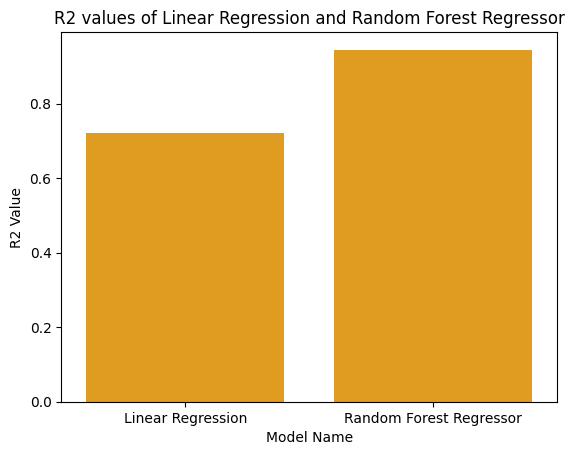

In [25]:
sns.barplot(x=['Linear Regression', 'Random Forest Regressor'], y=[r2Score,r2_rf], color='orange')
plt.title('R2 values of Linear Regression and Random Forest Regressor')
plt.xlabel('Model Name')
plt.ylabel('R2 Value')
plt.show()

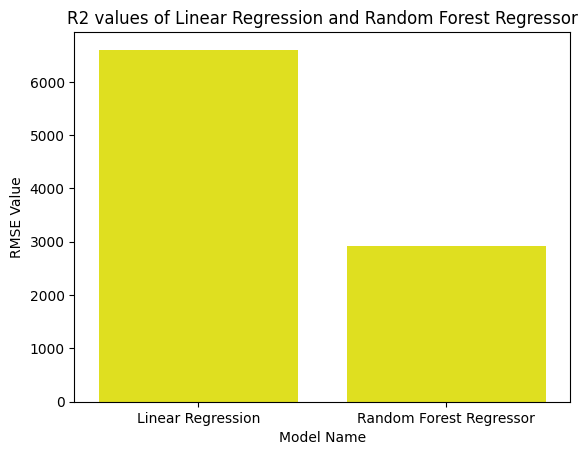

In [26]:
sns.barplot(x=['Linear Regression', 'Random Forest Regressor'], y=[rmse,rmse_rf], color='yellow')
plt.title('R2 values of Linear Regression and Random Forest Regressor')
plt.xlabel('Model Name')
plt.ylabel('RMSE Value')
plt.show()

Model Iteration: Random Forest Performance

Our comparative analysis confirms that the Random Forest Regressor provides a significant performance uplift over the baseline Linear Regression model.

Key Finding: Error Reduction

The new model demonstrates a substantial improvement in predictive power. The primary error metric, Root Mean Square Error (RMSE), was reduced from $6,601 (Linear Regression) to approximately $3,000 (Random Forest).

This confirms our hypothesis that the non-linear, ensemble-based approach of a Random Forest is far better suited for capturing the complex feature interactions (such as the non-linear effects of year and mpg) that our linear model could not.

Conclusion

We have successfully developed a reliable pricing model that achieves our project objective. The final Random Forest Regressor is well-suited for this task, capable of predicting a used vehicle's price with an average error margin of ± $3,000.

This model now provides a robust and sufficiently accurate tool for estimating vehicle valuations based on the available features.